In [1]:
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt

In [3]:
n = 10
probs = np.random.rand(n)
eps = 0.2

In [4]:
probs

array([0.83940156, 0.93142419, 0.31001728, 0.87354054, 0.04092373,
       0.47758512, 0.05444557, 0.39792354, 0.39779893, 0.16328683])

In [5]:
# 보상함수 ( 해당 조건을 만족하면 보상이 +1 되는 함수 )
def get_reward(prob, n=10):
  reward = 0
  for i in range(n):
    if random.random() < prob:
      reward += 1
  return reward

In [9]:
np.mean([get_reward(0.7) for _ in range(10000)])

7.0222

In [20]:
rewards_test = [get_reward(0.7) for _ in range(2000)]

Text(0, 0.5, '# Observations')

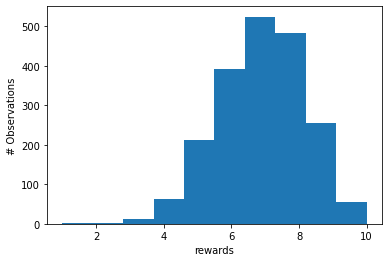

In [30]:
plt.figure(figsize=(6,4))
plt.hist(rewards_test)
plt.xlabel('rewards')
plt.ylabel('# Observations')

In [33]:
record = np.zeros((n,2))
record

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [ ]:
# 보상함수 ( 해당 조건을 만족하면 보상이 +1 되는 함수 )

def get_reward(prob, n=10):
  reward = 0
  for i in range(n):
    if random.random() < prob:
      reward += 1
  return reward

In [34]:
# 각 레버에 따른 보상 기록 갱신 함수

def update_record(record, action, r):
# action : 몇번째 레버를 돌리냐
# record : 각 레버를 돌린 횟수 & 평균보상
  new_r = (record[action,0]*record[action,1]+r)/(record[action,0]+1)
  record[action,1] = new_r
  return record


In [39]:
# 최선의 동작을 찾아내는 함수

def get_best_arm(record):
  arm_index = np.argmax(record[:,1], axis=0)
  return arm_index

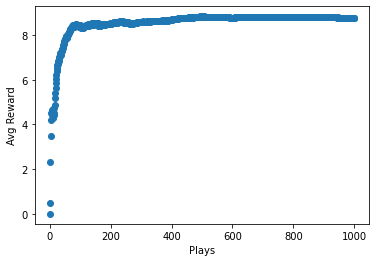

In [52]:
# 이제 위의 보상함수, 레버별 보상 기록 갱신 함수, 최선의 동작 탐색 함수를 모두 합쳐
# 강화학습 기초 모델을 만들 것이다.

fig,ax = plt.subplots(1,1)
ax.set_xlabel("Plays")
ax.set_ylabel("Avg Reward")
record = np.zeros((n,2)) # 각 레버별 평균보상을 기록하는 array 를 만든다.
probs = np.random.rand(n) # 각 레버별로 보상을 주는 확률을 probs 에 넣는다.
# probs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95]
# 10개의 레버 중에서 확률이 높은 것을 알아서 찾아간다.
eps = 0.2 # 입실론은 무작위 탐색의 비율이다. 20% 확률로 무작위 탐색을 하도록 하고, 80%는 최선의 레버선택을 하도록 시킨다.
rewards = [0] 

for i in range(1000):
  # 500번의 탐색을 한다.
  if random.random() > eps: # 80% 확률 - 최선의 선택 - 욕망을 따라간다. (greedy 탐욕법)
    choice = get_best_arm(record)
  else: # 20% 확률 - 무작위 탐색 - exploitation (탐색)
    choice = np.random.randint(10) # 10개의 레버 중 임의의 한개를 선택한다.

  r = get_reward(probs[choice]) # 해당 레버를 돌려 얻어낸 보상을 new_r 변수에 담아준다.
  record = update_record(record, choice, r) # record(보상 기록)에 새로 돌린 레버의 수와, 그에 해당하는 보상을 넣어 기록을 갱신해준다. 그리고 이를 record 에 다시 담아준다.
  mean_reward = ((i+1)*rewards[-1] + r)/(i+2) # 평균 보상을 구해준다.
  rewards.append(mean_reward) # 평균 보상이 어떻게 바뀌는지 리스트에 넣어준다. (관찰을 위해)

ax.scatter(np.arange(len(rewards)), rewards)
  

In [53]:
probs
# 10개의 레버들 중에서 가장 높은 확률을 가진게 0.9414. 
# 즉 기계가 시행착오를 통해 확률이 높은 것을 알아서 찾아간다.                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

array([0.12110969, 0.36782565, 0.73414737, 0.06583198, 0.25625184,
       0.52263938, 0.58230084, 0.94148638, 0.99329859, 0.05627725])